In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [4]:
df = pd.read_csv("Breast_Cancer_10k_Dataset.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
0,0.700286,0.346754,0.370444,1.787258,0.403685,0.279377,1.386830,0.094014,0.399636,0.209291,...,0.970835,0.036904,0.037286,0.034491,0.037132,0.036904,0.037286,0.034491,0.037132,0.0
1,0.265856,0.152764,0.115526,0.348744,0.127151,0.358692,0.690869,0.401549,0.347797,0.444867,...,0.969235,0.035825,0.036496,0.038695,0.037050,0.035825,0.036496,0.038695,0.037050,0.0
2,0.334299,0.482984,0.108333,0.948857,0.130840,0.107566,0.789947,0.144367,0.209247,0.647328,...,0.966383,0.038434,0.039016,0.042241,0.039882,0.038434,0.039016,0.042241,0.039882,0.0
3,0.246730,0.137993,0.386764,0.605961,0.061317,0.096054,0.806805,0.791261,0.421512,0.411795,...,0.997255,0.016449,0.016038,0.016550,0.016220,0.016449,0.016038,0.016550,0.016220,0.0
4,0.299272,0.134852,0.399222,2.690236,0.443913,0.284241,1.084008,0.409785,0.439806,0.569557,...,0.999006,0.012265,0.012695,0.013183,0.011792,0.012265,0.012695,0.013183,0.011792,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.314787,0.165941,0.052882,0.598516,0.011524,0.548656,0.562281,0.254759,0.169374,0.429100,...,0.956089,0.049863,0.050548,0.052926,0.051151,0.049863,0.050548,0.052926,0.051151,0.0
9996,0.322529,0.108607,0.295841,1.222765,0.152268,0.298615,0.782605,0.361387,0.119348,0.259371,...,0.964943,0.038036,0.039370,0.040807,0.037532,0.038036,0.039370,0.040807,0.037532,0.0
9997,0.488132,0.096971,0.506922,1.431612,0.783454,0.760137,0.810776,0.195986,0.254335,0.437187,...,0.998320,0.013041,0.013143,0.013223,0.012666,0.013041,0.013143,0.013223,0.012666,0.0
9998,0.208528,0.097548,0.144325,0.552617,0.079363,0.389360,0.367227,0.483972,0.379530,0.558510,...,0.960037,0.042079,0.042240,0.045559,0.043702,0.042079,0.042240,0.045559,0.043702,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 2103 entries, 0 to 2102
dtypes: float64(2103)
memory usage: 160.4 MB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.421480,0.154525,0.262923,1.462605,0.305738,0.401468,0.654740,0.348933,0.443406,0.237302,...,9.795403e-01,0.032846,0.032743,0.033638,0.032761,0.032846,0.032743,0.033638,0.032761,0.025000
std,0.247235,0.139594,0.166869,0.755386,0.298090,0.251406,0.271248,0.243571,0.270285,0.181575,...,1.888597e-02,0.013325,0.013460,0.013926,0.013479,0.013325,0.013460,0.013926,0.013479,0.156133
min,0.000000,0.000000,0.000000,0.004140,0.000000,0.000000,0.028504,0.000000,0.000000,0.000000,...,-9.668762e-07,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000000
25%,0.242560,0.057190,0.144168,0.858731,0.092471,0.204367,0.460227,0.163886,0.240486,0.103216,...,9.687565e-01,0.022144,0.021883,0.022167,0.021809,0.022144,0.021883,0.022167,0.021809,0.000000
50%,0.388734,0.113667,0.224014,1.391614,0.200908,0.360692,0.634958,0.303230,0.390154,0.190851,...,9.796807e-01,0.034782,0.034809,0.035913,0.034778,0.034782,0.034809,0.035913,0.034778,0.000000
75%,0.551581,0.206418,0.338124,1.988805,0.425999,0.560465,0.825720,0.485672,0.599284,0.323760,...,9.951777e-01,0.042164,0.042218,0.043633,0.042262,0.042164,0.042218,0.043633,0.042262,0.000000
max,2.287981,1.134683,1.343141,4.467446,2.090162,1.834049,1.903756,3.696818,2.056984,1.556397,...,9.996575e-01,0.331074,0.330605,0.329804,0.330719,0.331074,0.330605,0.329804,0.330719,1.000000


In [7]:
df.fillna(0, inplace=True)

In [8]:
df['2102'].value_counts()

0.0    9750
1.0     250
Name: 2102, dtype: int64

In [9]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [10]:
X=df.drop("2102",axis=1)
Y=df["2102"]
seed = 1
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)

In [11]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

In [12]:
#DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
dt_model.score(X_train,y_train)

1.0

In [14]:
dt_model.score(X_test,y_test)

0.964

In [15]:
prediction = dt_model.predict(X_test)
y_pred = prediction

In [16]:
metrics.accuracy_score(y_test, y_pred)

0.964

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[481,   6],
       [ 12,   1]], dtype=int64)

In [18]:
from sklearn.utils import class_weight
#from sklearn.utils.class_weight import compute_class_weight
#class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_labels), y= train_labels)
#class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)
#class_weights

In [19]:
#class_weights = {0:0.51282051, 1:20.}

In [22]:
#class_weights={"class_1": 1, "class_2": 100}

dt_model = DecisionTreeClassifier(class_weight = 'balanced')

dt_model.fit(X_train, y_train)#, class_weight=class_weights)


DecisionTreeClassifier(class_weight='balanced')

In [23]:
prediction = dt_model.predict(X_test)
y_pred = prediction

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.948

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[474,  13],
       [ 13,   0]], dtype=int64)

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [28]:
pred_test = lr.predict(X_test)

In [29]:
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

NameError: name 'f1_score' is not defined

In [30]:
confusion_matrix(y_test, y_pred)

array([[474,  13],
       [ 13,   0]], dtype=int64)

In [31]:
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [32]:
pred_test = lr.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[474,  13],
       [ 13,   0]], dtype=int64)

In [35]:
lr = LogisticRegression(solver='newton-cg')
weights = np.linspace(0.0,0.99,200)


In [36]:
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}


In [39]:
from sklearn.model_selection import StratifiedKFold
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [40]:
from sklearn.ensemble import IsolationForest


In [41]:
model = IsolationForest(n_estimators = 10)
model.fit(X_train,y_train)


IsolationForest(n_estimators=10)

In [42]:
prediction = model.predict(X_test)
y_pred = prediction

In [43]:
confusion_matrix(y_test, y_pred)

array([[  0,   0,   0],
       [ 30,   0, 457],
       [  1,   0,  12]], dtype=int64)

In [44]:
metrics.accuracy_score(y_test, y_pred)

0.024

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred=clf.predict(X_test)

E:\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


E:\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


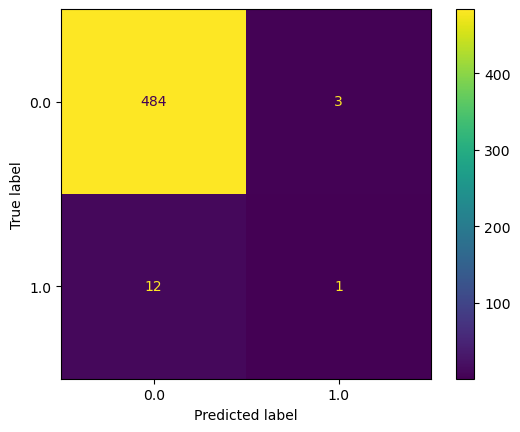

In [47]:
plot_confusion_matrix(clf,X_test, y_test)


In [48]:
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.97
Precision 0.25
Recall 0.07692307692307693
F1 score 0.11764705882352941


In [49]:
clf_cw = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
y_pred= clf_cw.predict(X_test)
print("Accuracy",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))

Accuracy 0.914
Precision 0.08333333333333333
Recall 0.23076923076923078
F1 score 0.12244897959183675


E:\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


E:\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


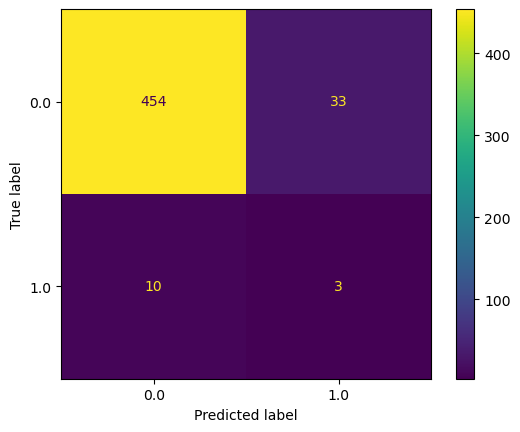

In [50]:
plot_confusion_matrix(clf_cw, X_test, y_test)


In [51]:
pip install imblearn


     ------------------------------------ 226.0/226.0 kB 985.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Accurcay 0.524
Precision 0.037037037037037035
Recall 0.6923076923076923
F1 score 0.0703125


E:\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


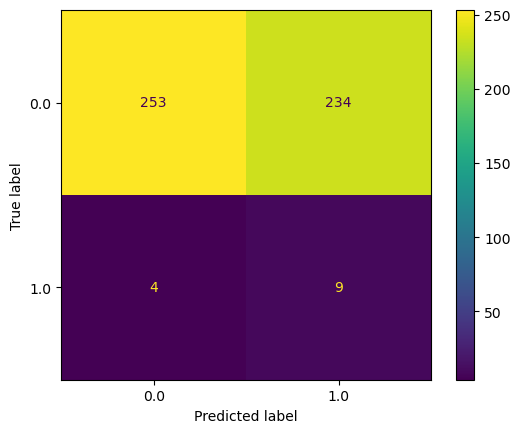

In [53]:
from imblearn.under_sampling import RandomUnderSampler

X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

rus= RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)
clf_rus=  LogisticRegression(random_state=0).fit(X_train, y_train)
# predict the test data
y_pred= clf_rus.predict(X_test)
# print the model performance metrics
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))
plot_confusion_matrix(clf_rus, X_test, y_test)

Accurcay 0.916
Precision 0.08571428571428572
Recall 0.23076923076923078
F1 score 0.12500000000000003


E:\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


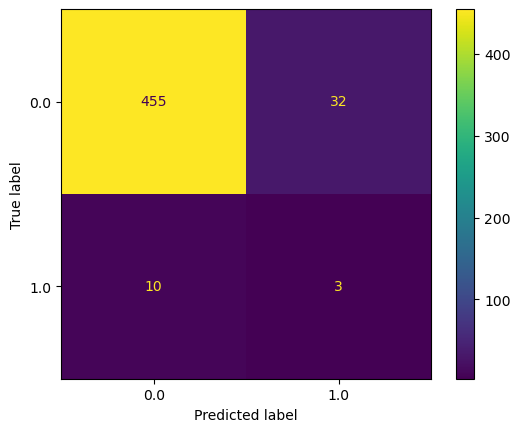

In [54]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

ros= RandomOverSampler(sampling_strategy='auto')
X_train, y_train = ros.fit_resample(X_train, y_train)
clf_ros=  LogisticRegression(random_state=0).fit(X_train, y_train)
# predict the test data
y_pred= clf_ros.predict(X_test)
# print the model performance metrics
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))
plot_confusion_matrix(clf_ros, X_test, y_test)

Accurcay 0.912
Precision 0.05714285714285714
Recall 0.15384615384615385
F1 score 0.08333333333333333


E:\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


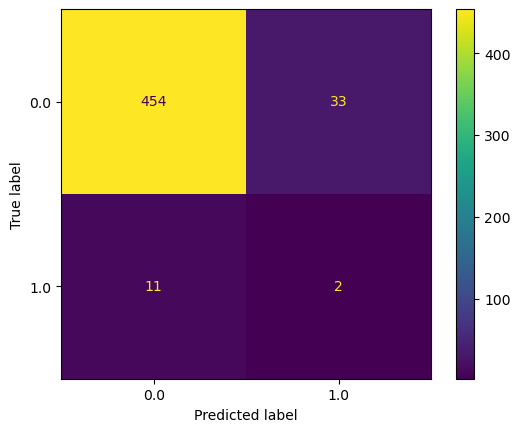

In [55]:
from imblearn.over_sampling import SMOTE


X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.25, random_state=1)

sm = SMOTE(random_state=27, sampling_strategy='minority', k_neighbors=5)
X_train, y_train = sm.fit_resample(X_train, y_train)
clf_sm = LogisticRegression(random_state=0).fit(X_train, y_train)
# predict the test data
y_pred= clf_sm.predict(X_test)
# print the model performance metrics
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))
plot_confusion_matrix(clf_sm, X_test, y_test)